# Import the data

In [ ]:
!wget https://www.dropbox.com/sh/ld6fx87zdvlwxiz/AACbD2hgIL5CCzEY19nvXbpDa?dl=0 # Import the data from dropbox

--2021-05-29 11:12:08--  https://www.dropbox.com/sh/ld6fx87zdvlwxiz/AACbD2hgIL5CCzEY19nvXbpDa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/ld6fx87zdvlwxiz/AACbD2hgIL5CCzEY19nvXbpDa [following]
--2021-05-29 11:12:08--  https://www.dropbox.com/sh/raw/ld6fx87zdvlwxiz/AACbD2hgIL5CCzEY19nvXbpDa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfbf19d254e8af0756d54ffea12.dl.dropboxusercontent.com/zip_download_get/AyxN9L0LWqE-BvdsbdcWpA0EKwH0Qd_K61Y4Mpiq1QDLSoi7HQPsyFZ_tkP_-i6cKBqi_LSpgmt_qFoBprU3FNUPhq63v52n9bzyRufmFtNoOA# [following]
--2021-05-29 11:12:09--  https://ucfbf19d254e8af0756d54ffea12.dl.dropboxusercontent.com/zip_download_get/AyxN9L0LWqE-BvdsbdcWpA0EKwH0Qd_K61Y4Mpiq1QDLSoi7HQPsyFZ_tkP_-i6cKBqi_LSpgmt_q

In [ ]:
!unzip /content/AACbD2hgIL5CCzEY19nvXbpDa?dl=0 # unzip the data

Archive:  /content/AACbD2hgIL5CCzEY19nvXbpDa?dl=0
mapname:  conversion of  failed
 extracting: test_mSzZ8RL.csv        
 extracting: train_s3TEQDk.csv       
 extracting: sample_submission_eyYijxG.csv  

1 archive had fatal errors.


# Load the Data

In [ ]:
# Import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/train_s3TEQDk.csv") # Read the train file
test = pd.read_csv("/content/test_mSzZ8RL.csv") # Read the test file

In [ ]:
# Show first 10 rows of training set
train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [ ]:
train.info() #Extract the basic information from the data like dtypes of features, number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


**Credit_Product feature have some null values.**

In [ ]:
train.isnull().sum() # Check the count for null values in feature

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [ ]:
# Extract the null columns from training and testing set

null_columns_train = [col for col in train.columns if train[col].isnull().sum() !=0]
null_columns_test = [col for col in test.columns if test[col].isnull().sum() !=0]

# Print the percentage of null values in each column
def perc_null_vals(null_columns, data, dataset_type = None):
  total_val_counts = data.shape[0] # Total values in the dataset
  for col in null_columns:
    null_val_counts = data[col].isnull().sum() # number of null values in the dataset
    perc_null_vals = float(null_val_counts)*100/total_val_counts
    print("The percentage of null values in {} in the {} set is {:.3f}%".format(col, dataset_type, perc_null_vals))

# Call the above function
perc_null_vals(null_columns_train, train, "train")
perc_null_vals(null_columns_test, test, "test")

The percentage of null values in Credit_Product in the train set is 11.934%
The percentage of null values in Credit_Product in the test set is 11.890%


**Almost equal percentage of null values are present in both the dataset.**

# EDA on trainset

In [ ]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
train['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [ ]:
# Check for unique values in the categorical columns
cat_cols = [cols for cols in train.select_dtypes('O').columns]

def print_unique_vals(data, columns):
  # iterate over each column and print the unique values in each categorical column as well as their counts
  for col in columns:
    print("Unqiue values in {} are".format(col))
    print(data[col].value_counts())
    print()

# Call the above method
print_unique_vals(train, cat_cols)

Unqiue values in ID are
EQSBMXRQ    1
CCDGJAJ7    1
ZXPMKAQJ    1
D4BVNDTN    1
K7XUOXES    1
           ..
HGZULHJU    1
F2MDTUAF    1
ZSQJZ7SX    1
4RNVPCS7    1
KBXQVVDY    1
Name: ID, Length: 245725, dtype: int64

Unqiue values in Gender are
Male      134197
Female    111528
Name: Gender, dtype: int64

Unqiue values in Region_Code are
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

Unqiue values in Occupation are
Self_Employed    100886
Salaried          71999
Other             701

In [ ]:
# Check similarly for test set
cat_cols_test = [col for col in test.select_dtypes('O').columns]
print_unique_vals(test, cat_cols_test)

Unqiue values in ID are
K7TMVRQK    1
MADXAC8Y    1
EV22JE5E    1
GU76PPSV    1
7PDYREDN    1
           ..
GZ2RM2MA    1
U9MXFO8N    1
RMPBWEEJ    1
HTGIYKWR    1
VPUET9LA    1
Name: ID, Length: 105312, dtype: int64

Unqiue values in Gender are
Male      57705
Female    47607
Name: Gender, dtype: int64

Unqiue values in Region_Code are
RG268    15125
RG283    12881
RG254    11737
RG284     8173
RG277     5596
RG280     5529
RG270     3440
RG269     3288
RG261     3286
RG251     2678
RG257     2588
RG272     2338
RG282     2337
RG274     2208
RG281     2144
RG252     1811
RG273     1803
RG263     1615
RG279     1600
RG275     1383
RG260     1300
RG264     1241
RG256     1194
RG276     1185
RG259     1102
RG250     1048
RG255      891
RG278      824
RG258      812
RG253      810
RG262      800
RG265      668
RG271      654
RG266      631
RG267      592
Name: Region_Code, dtype: int64

Unqiue values in Occupation are
Self_Employed    43192
Salaried         30913
Other            30131
En

**Every Categorical column other than ID and Region_Code have same subcategories in both train and test set**

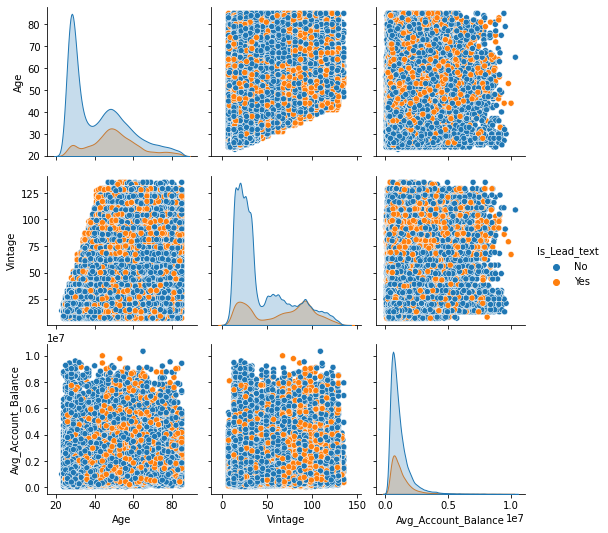

In [ ]:
# Create a new column called is_lead_text for plotting a pairplot
train['Is_Lead_text'] = train['Is_Lead'].apply(lambda x : "Yes" if x==1 else "No")

# Create a copy of train set
train_copy = train.copy()
train_copy.drop('Is_Lead',axis = 1, inplace=True)

# Plot the pairplot
sns.pairplot(train_copy, hue = "Is_Lead_text")
plt.show()

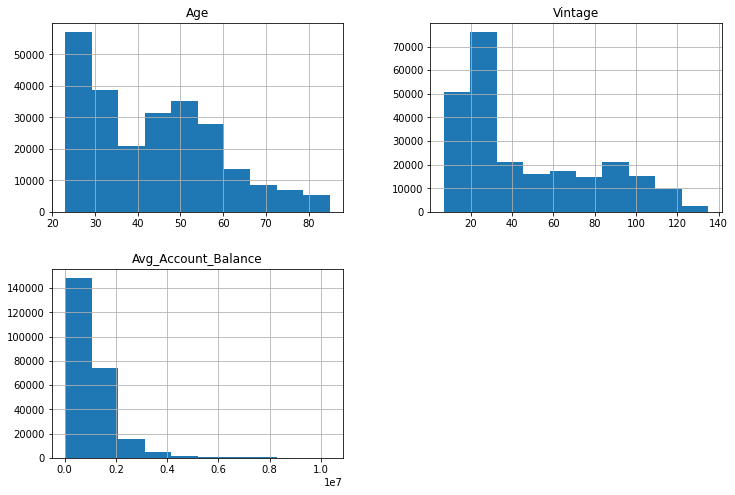

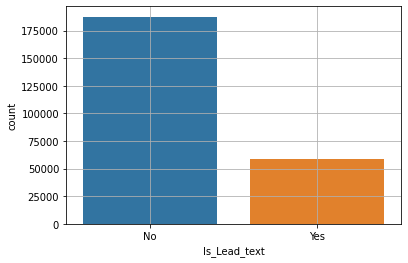

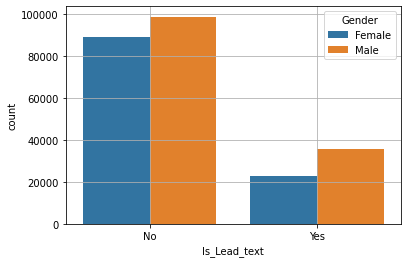

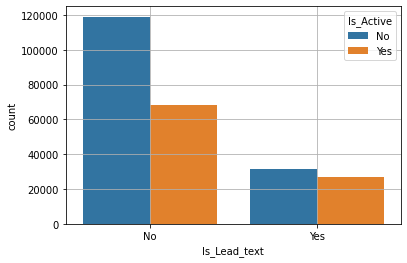

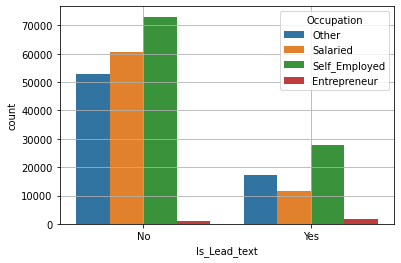

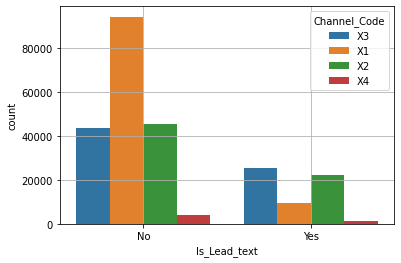

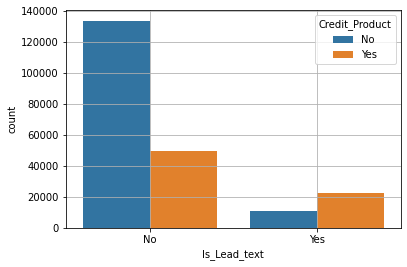

In [ ]:
# extract numerical columns and plot scatter plots between each
num_cols = [col for col in train_copy.select_dtypes('int')]

# Check the distribution of the numerical features
train_copy.hist(figsize=(12,8))
plt.show()

# Check for class imbalance
sns.countplot(x = train_copy['Is_Lead_text'])
plt.grid()
plt.show()

# Check for class count w.r.t every other categorical_column
sns.countplot(x = train_copy['Is_Lead_text'], hue=train_copy['Gender'])
plt.grid()
plt.show()

sns.countplot(x = train_copy['Is_Lead_text'], hue=train_copy['Is_Active'])
plt.grid()
plt.show()

sns.countplot(x = train_copy['Is_Lead_text'], hue=train_copy['Occupation'])
plt.grid()
plt.show()

sns.countplot(x = train_copy['Is_Lead_text'], hue=train_copy['Channel_Code'])
plt.grid()
plt.show()

sns.countplot(x = train_copy['Is_Lead_text'], hue=train_copy['Credit_Product'])
plt.grid()
plt.show()

In [ ]:
train_copy.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead_text
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,No
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,No
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,No
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,No
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,No


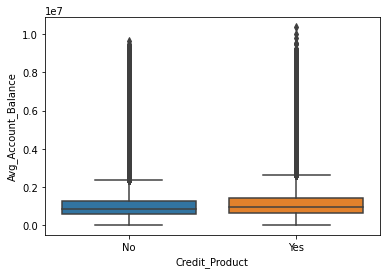

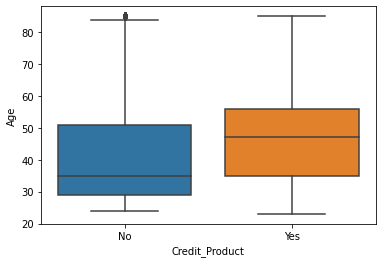

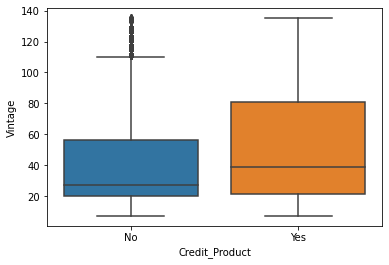

In [ ]:
# plot boxplots w.r.t Is_Lead_text
sns.boxplot(x=train_copy['Credit_Product'], y=train_copy['Avg_Account_Balance'])
plt.show()

sns.boxplot(x=train_copy['Credit_Product'], y=train_copy['Age'])
plt.show()

sns.boxplot(x=train_copy['Credit_Product'], y=train_copy['Vintage'])
plt.show()



1.   Those between age 55-60 or Vintage between 60-80 have a Credit_Product.
2.   Those between age 30-40 do not have a Credit_Product.



In [ ]:
# Fill na in credit_product
def fill_na(data, null_indices):
  for i in null_indices:
    if  (55 <= train['Age'].iloc[i] <=60)  and (60 <= train['Vintage'].iloc[i] <= 40):
      train['Credit_Product'].iloc[i] = "Yes"
    elif 30 <= train['Age'].iloc[i] <= 40:
      train['Credit_Product'].iloc[i] = "No"


# Find null indices
null_indices = train[train['Credit_Product'].isnull() == True].index

# Call the above method and fill the null values
fill_na(train, null_indices=null_indices)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         25523
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
Is_Lead_text               0
dtype: int64

In [ ]:
train['Credit_Product'].value_counts()

No     148159
Yes     72043
Name: Credit_Product, dtype: int64

In [ ]:
# For rest of the null values introduce a new category of "Unknown"
train.fillna('Unkown', inplace=True)

In [ ]:
# Similarly use fill_na(user defined function on test set)
null_indices_test = test[test['Credit_Product'].isnull()==True].index
fill_na(test, null_indices_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test.isnull().sum() # this logic did not work on test set, fill the null vlaues with unknown brand

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [ ]:
test.fillna('Unknown', inplace=True)

In [ ]:
# Check for null values
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
Is_Lead_text           0
dtype: int64

In [ ]:
test.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

# Data preprocessing

In [ ]:
train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Is_Lead_text
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,No
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,No
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,No
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,No
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,No
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0,No
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,Unkown,1056750,Yes,1,Yes
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0,No
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0,No
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0,No


In [ ]:
# Drop the is_lead_text column, ID and Region_Code
train.drop(['ID', 'Region_Code', 'Is_Lead_text'], axis=1, inplace=True)

In [ ]:
# Encode the columns
cat_cols_updated = [cols for cols in train.select_dtypes('O').columns]
cat_cols_updated

['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encoder(data, cat_cols):

  for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].values.reshape((-1,1)))
  return data


In [ ]:
encoded_data = encoder(train, cat_cols_updated) # use the encoder function

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,Unknown,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [ ]:
# Store the Sample ID of the test set
test_ID = test['ID']

In [ ]:
test.drop(['ID', 'Region_Code'],axis=1, inplace=True)
cat_cols_test_updated = [cols for cols in test.select_dtypes('O').columns]

In [ ]:
cat_cols_test_updated

['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

In [ ]:
# Call the encoder funciton
encoded_data_test = encoder(test, cat_cols_test_updated)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
encoded_data_test.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,1,0,25,2,742366,0
1,1,43,1,1,49,1,925537,0
2,1,31,2,0,14,0,215949,0
3,1,29,1,0,33,0,868070,0
4,0,29,1,0,19,0,657087,0


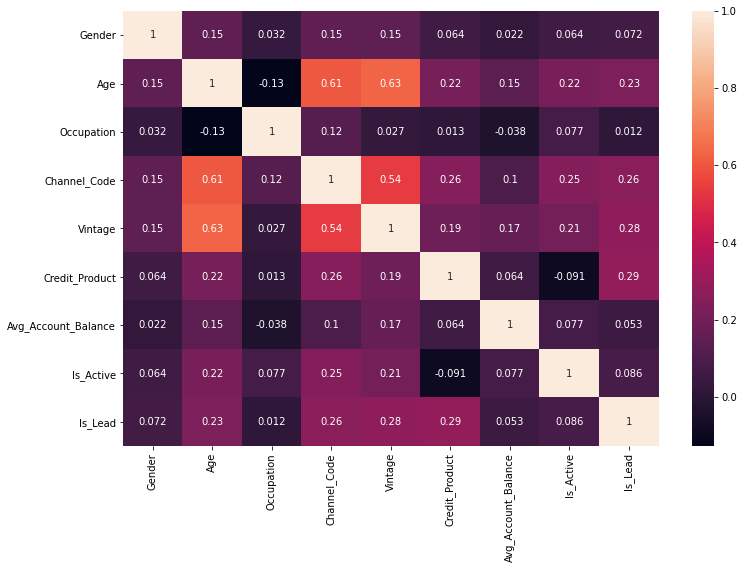

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(encoded_data.corr(), annot=True)
plt.show()

In [ ]:
# Scale the training and testing data
from sklearn.preprocessing import MinMaxScaler

def scaled_data(data):
  for col in data.columns:
    # Min Max Scaler object
    mms = MinMaxScaler()
    data[col] = mms.fit_transform(data[col].values.reshape((-1,1)))
  return data

In [ ]:
final_training_data = scaled_data(encoded_data.drop('Is_Lead', axis=1))
final_testing_data = scaled_data(encoded_data_test)

In [ ]:
final_training_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0.0,0.806452,0.333333,0.666667,0.281250,0.0,0.099205,0.0
1,0.0,0.112903,0.666667,0.000000,0.195312,0.0,0.054321,0.0
2,0.0,0.532258,1.000000,0.666667,0.148438,0.0,0.141660,1.0
3,1.0,0.177419,0.666667,0.000000,0.093750,0.0,0.043525,0.0
4,0.0,0.112903,0.666667,0.000000,0.203125,0.0,0.083823,0.0


In [ ]:
len(final_training_data.columns)

8

In [ ]:
len(final_testing_data.columns)

8

# Machine Learninig Modelling

In [ ]:
final_training_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0.0,0.806452,0.333333,0.666667,0.281250,0.0,0.099205,0.0
1,0.0,0.112903,0.666667,0.000000,0.195312,0.0,0.054321,0.0
2,0.0,0.532258,1.000000,0.666667,0.148438,0.0,0.141660,1.0
3,1.0,0.177419,0.666667,0.000000,0.093750,0.0,0.043525,0.0
4,0.0,0.112903,0.666667,0.000000,0.203125,0.0,0.083823,0.0


In [ ]:
target_variable = encoded_data['Is_Lead'] # Store the target variable

In [ ]:
# Model selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

# Split the training data
X_train, X_test, y_train, y_test = train_test_split(final_training_data, target_variable, test_size=0.2, random_state=42)

In [ ]:
# Define a function to compute all the metrics
def compute_metrics(y_true, y_pred, y_score, model):

  # 1. Accuracy Score
  acc_score = accuracy_score(y_true=y_true, y_pred=y_pred)

  # 2. ROC_AUC_Score
  roc_score = roc_auc_score(y_true=y_true, y_score=y_score)

  # 3. Precision Score
  prec = precision_score(y_true=y_true, y_pred=y_pred)

  # Recall Score
  rec = recall_score(y_true=y_true, y_pred=y_pred)

  # Create a df of all the metrics
  df_metrics = pd.DataFrame(np.array([acc_score, roc_score, prec, rec]).reshape((1,4)), columns=["Accuracy", "ROC_AUC_Score", "Precision", "Recall"], index=[model])
  return df_metrics

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV # Logistic Regression Model

# Model object
lg_clf = LogisticRegressionCV(cv=3, verbose=1, random_state=42, n_jobs=-1)

# fit the model
lg_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.9s finished


LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=1)

In [ ]:
# Make predicitons on the test set and compute the metrics
predictions_1 = lg_clf.predict(X_test)
prediction_prob1 = lg_clf.predict_proba(X_test)
prediction_prob1 = prediction_prob1[ : ,1]

In [ ]:
log_reg_results = compute_metrics(y_true = y_test, y_pred = predictions_1, y_score = prediction_prob1, model = "Logistic Regression")

In [ ]:
log_reg_results

,Accuracy,ROC_AUC_Score,Precision,Recall
Logistic Regression,0.764004,0.756636,0.503011,0.193978


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model object
dt_clf_default = DecisionTreeClassifier() # Default Model

# Fit the model
dt_clf_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Make predictions and compute metrics
predictions_2 = dt_clf_default.predict(X_test)
prediction_prob2 = dt_clf_default.predict_proba(X_test)
prediction_prob2 = prediction_prob2[ : ,1]

# Compute the metrics
dt_clf_default_metrics = compute_metrics(y_true=y_test, y_pred=predictions_2, y_score=prediction_prob2, model = "Decision Tree Default")
dt_clf_default_metrics

,Accuracy,ROC_AUC_Score,Precision,Recall
Decision Tree Default,0.77249,0.691106,0.518448,0.536688


In [ ]:
# Hyperparameter Tuning

# set parameters
criterion = ["ginin", "entropy"]
splitter = ["best", "random"]
max_depth = [None, 10, 20, 30]
min_samples_split = [2,3,4,5,6,8,9,10]
min_samples_leaf = [1,2,3,4,5]
min_weight_fraction_leaf = [ 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
max_features = ["auto", "sqrt", "log2", None]
class_weight = [None, "balanced"]


# Create a parameter grid
params = {"criterion" : criterion,
          "splitter" : splitter,
          "max_depth" : max_depth,
          "min_samples_split" : min_samples_split,
          "min_samples_leaf" : min_samples_leaf,
          "min_weight_fraction_leaf" : min_weight_fraction_leaf,
          "max_features" : max_features,
          "class_weight" : class_weight
          }

# Model Object
dt_clf = DecisionTreeClassifier(random_state=42)

# Randomised Search CV
rscv_dt_clf = RandomizedSearchCV(dt_clf, params, n_iter=20, n_jobs=-1, cv=3, verbose=1, random_state=42)

# Fit the model
rscv_dt_clf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [ ]:
dt_best_estimator = rscv_dt_clf.best_estimator_

In [ ]:
dt_best_estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Make predicitons and compute metrics
predictions_3 = dt_best_estimator.predict(X_test)
prediction_prob3 = dt_best_estimator.predict_proba(X_test)
prediction_prob3 = prediction_prob3[ : , 1]

# Compute the metrics
dt_clf_best_est_results = compute_metrics(y_test, predictions_3, prediction_prob3, "Decision Tree Best Estimator")
dt_clf_best_est_results

,Accuracy,ROC_AUC_Score,Precision,Recall
Decision Tree Best Estimator,0.826778,0.795158,0.680552,0.504516


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model Object
rf_clf_default = RandomForestClassifier() # Default Model

# Fit the model
rf_clf_default.fit(X_train, y_train)

# Make Predicitons and Compute metrics
predictions_4 = rf_clf_default.predict(X_test)
prediction_prob4 = rf_clf_default.predict_proba(X_test)[ : , 1]

# Compute the metrics
rf_clf_default_results = compute_metrics(y_test, predictions_4, prediction_prob4 , model = "Random Forest Default")

In [ ]:
rf_clf_default_results

,Accuracy,ROC_AUC_Score,Precision,Recall
Random Forest Default,0.828162,0.825346,0.668611,0.542366


In [ ]:
# Hyperparameter Tuninig
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion' : ["gini", "entropy"],
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 69.7min


In [ ]:
# Make Predicitons and Compute metrics
predictions_8 = grid_search.predict(X_test)
prediction_prob8 = grid_search.predict_proba(X_test)[ : , 1]

# Compute the metrics
rf_clf_best_results = compute_metrics(y_test, predictions_8, prediction_prob8 , model = "Random Forest Best Estimator")

## XGBoost

In [ ]:
from xgboost import XGBClassifier

# Model object
xgb_clf = XGBClassifier()

# Fit the object
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Make predictions and compute metrics
predictions_5 = xgb_clf.predict(X_test)
prediction_prob5 = xgb_clf.predict_proba(X_test)[ : , 1]

# compute the metrics
xgb_clf_results = compute_metrics(y_test, predictions_5, prediction_prob5, model = "XGB Classifier")
xgb_clf_results

,Accuracy,ROC_AUC_Score,Precision,Recall
XGB Classifier,0.849161,0.85548,0.801288,0.481806


## Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# default model
adb_clf = AdaBoostClassifier()

# Fit the model
adb_clf.fit(X_train, y_train)

# Make predictions and compute metrics
predictions_5 = adb_clf.predict(X_test)
prediction_prob5 = adb_clf.predict_proba(X_test)[ : ,1]

In [ ]:
adb_clf_results = compute_metrics(y_test, predictions_5, prediction_prob5, "AdaBoost Classifier")

In [ ]:
adb_clf_results

,Accuracy,ROC_AUC_Score,Precision,Recall
AdaBoost Classifier,0.843748,0.84313,0.812184,0.441548


## SVM

In [ ]:
from sklearn.svm import SVC

# Model object
svm_clf = SVC()

# Fit the model
svm_clf.fit(X_train, y_train)

# Make predictions
predictions_6 = svm_clf.predict(X_test)
#prediction_prob6 = svm_clf.predict_proba(X_test)[ : ,1]

In [ ]:
# Compute metrics
svm_clf.decision_function(X_test)

array([-0.99969603, -0.99999553, -1.00950751, ..., -1.00016513,
       -1.00316666, -0.99976266])

## Neural Networks

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential


# Build a sequential model
model = Sequential()

# Add layers
model.add(Dense(50, activation='relu', input_shape = (X_train.shape[-1],)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

# buld the model
print(model.summary())

# Compile the model
metric = tf.metrics.AUC(from_logits=True)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=metric)
hist = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=EarlyStopping(patience=10))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 50)                700       
_________________________________________________________________
dense_22 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 151       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
4915/4915 [==============================] - 17s 3ms/step - loss: 0.4867 - auc_2: 0.6300 - val_loss

In [ ]:
# make predictions and compute metrics
predictions_7 = model.predict_classes(X_test)
prediction_prob7 = model.predict_proba(X_test)

# Compute metrics
nn_model_metrics = compute_metrics(y_test, predictions_7, prediction_prob7, "Neural Network")
nn_model_metrics

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning:

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.



,Accuracy,ROC_AUC_Score,Precision,Recall
Neural Network,0.849893,0.85391,0.805524,0.48172


# Predictions

## Approach 1


*   Logistic Regression
*   Decision Tree
*   Random Forest Classifier
*   XGBoost Classifier
*   AdaBoost Classifier
*   Neural Network







In [ ]:
final_testing_data.rename(columns={'Credit_Product_Unknown' : 'Credit_Product_Unkown'}, inplace=True)

In [ ]:
# Compare the models
approach_1_result_metrics = pd.concat([log_reg_results, 
                                       dt_clf_default_metrics, 
                                       dt_clf_best_est_results, 
                                       rf_clf_default_results,
                                       xgb_clf_results,
                                       adb_clf_results,
                                       nn_model_metrics]).sort_values(['ROC_AUC_Score'], ascending=False)
approach_1_result_metrics

,Accuracy,ROC_AUC_Score,Precision,Recall
XGB Classifier,0.849751,0.856093,0.789963,0.496946
Neural Network,0.849893,0.853910,0.805524,0.481720
AdaBoost Classifier,0.843443,0.842918,0.805060,0.446194
Logistic Regression,0.842771,0.828744,0.834650,0.418151
Random Forest Default,0.826880,0.825343,0.665253,0.539699
Decision Tree Best Estimator,0.832353,0.806976,0.694866,0.519312
Decision Tree Default,0.771899,0.690987,0.517176,0.537462


In [ ]:
def make_predictions(model, model_object, data, id_column, path="/content/"):

  if model != "NeuralNetwork":
    # make predictions
    predictions = model_object.predict(data)
  else:
    predictions = model_object.predict_classes(data).reshape((-1,))

  # Concatenate the predictions and the ID
  prediction_df = pd.DataFrame({"ID" : test_ID, "Is_Lead" : predictions})

  # store into .csv
  dest = path + model + "_" + "submissions.csv"
  prediction_df.to_csv(dest, index=False)

In [ ]:
models = {"LogisticRegression" : lg_clf, 
          "DecisionTree" : dt_best_estimator, 
          "RandomForest" : rf_clf_default,
          "XGBoost" : xgb_clf,
          "AdaBoost" : adb_clf,
          "NeuralNetwork" : model
          }

# Iterate over the itemrs and Call the above method
for mod, model_obj in models.items():
  make_predictions(model = mod, model_object=model_obj, data=final_testing_data, id_column = test_ID)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:
final_testing_data.shape

(105312, 13)